Most data are complex. Simple linear boundaries cannot be used to separate the data. We need non-linear boundaries to separate the data

**When do we use Non-Linear models??**
WHEN LINEAR MODELS ARE UNABLE TO MODEL THE DATA OR CREATE BOUNDARIES FOR THE DATA, WE USE NON-LINEAR MODELS

**DEEP LEARNING MODEL**
Linearly combining existing models to create new non-linear model that better classify our data.

Deep learning model ---> Non Linear Activation Function(Linear Combination of existing models + Bias)

The final model looks much similar to the initial model with higher weights


1. Training in neural network is same as that of Perceptron
2. Perceptron - Backprogated to single linear model by minimizing the error fn
3. Neural network - Back propagated to all the linear models by minimizing the error fn

**What is the error function?**

CrossEntropy = -Negative(Average of the getting a blue as blue and red as red) ---> -(sum(xi*p(xi)))

Cross Entropy = -(Sum of probabilities for the right Labels )
low Cross Entropy low Error
High CE high error

Eg -(-0.5 +-0.9 -0.8) > -(1+1+1+1)


Gradient -- Gradient of error is calculated, with respect to every weight.



In [ ]:
 !pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
npts = 500
X, y = datasets.make_circles(n_samples=npts, noise=0.1, random_state=123, factor=0.2)##how the size of one circle should be w.r.t another## noise adds noise to the circle, if zero, perfectly circular shape ## if cluster_std == 0 then exactly around the center is chosen

In [ ]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [ ]:
print(x_data.shape)
print(y_data.shape)

torch.Size([500, 2])
torch.Size([500, 1])


In [ ]:
def scatterplot():
  plt.scatter(X[y==0, 0], X[y==0,1])
  plt.scatter(X[y==1, 0], X[y==1,1])

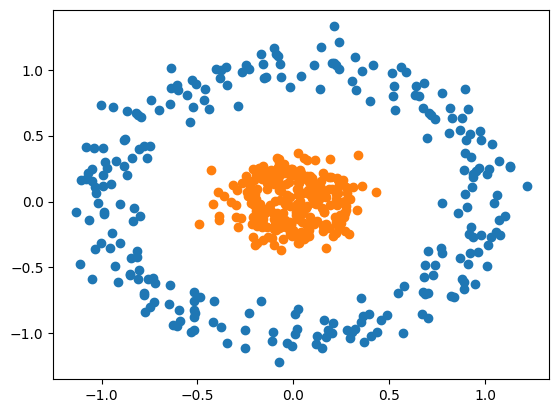

In [ ]:
scatterplot()

WHat is CROSS ENTROPY

Cross-entropy is a loss function used in classification problems to measure the difference between two probability distributions: the true labels and the predicted probabilities. It quantifies how well the predicted probability distribution matches the actual distribution.


negative Summation(ln of all probabilities)

GD tries to reduce this cross entropy and updates the weights of line equation (mx + c)

FOR PREDICTION - Since this is a classifier, activation function is applied on top of the (mx+c value). Here, we apply sigmoid function -> 1/(1+e^-x)

PERCEPTRON CONTAINS ONLY 1 INPUT LAYER, 1 OUTPUT LAYER
NO HIDDEN LAYERS IN BETWEEN

In [ ]:
import torch.nn as nn

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super(Model, self).__init__()
    self.linear1 = nn.Linear(input_size,H1) # Linear layer 1
    self.linear2 = nn.Linear(H1, output_size) # Linear layer 2
    #self.sigmoid = nn.Sigmoid() # Initialize the sigmoid function
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))  #Apply the linear function to x
    x = torch.sigmoid(self.linear2(x)) #Apply the linear function to x
    return x
  def predict (self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


Along with perceptron, we have hidden layer implementation

Lesser number of hidden nodes -- cannot fir complex data
More number of hidden nodes -- Overfitting

In [ ]:
##Creating a model with two inputs and single output
torch.manual_seed(2)
model = Model(2,4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


Adam is a combination of two other variants of SGD - AdaGrad, RMSProp
Adam is the default recommendation for optimizer now.

In [ ]:
criterion = nn.BCELoss() ##LOSS FUNCTION
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) ##OPTIMIZATION FUNCTION

In [ ]:
x_data.T.shape

torch.Size([2, 500])

In [ ]:
epochs =1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print('epoch: ', i, 'loss: ', loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0 loss:  0.7148520350456238
epoch:  1 loss:  0.7117707133293152
epoch:  2 loss:  0.7089375257492065
epoch:  3 loss:  0.7063546180725098
epoch:  4 loss:  0.7040227055549622
epoch:  5 loss:  0.7019400596618652
epoch:  6 loss:  0.7001036405563354
epoch:  7 loss:  0.6985083818435669
epoch:  8 loss:  0.6971474885940552
epoch:  9 loss:  0.6960120797157288
epoch:  10 loss:  0.6950911283493042
epoch:  11 loss:  0.6943708658218384
epoch:  12 loss:  0.6938351988792419
epoch:  13 loss:  0.6934651136398315
epoch:  14 loss:  0.6932395100593567
epoch:  15 loss:  0.6931353807449341
epoch:  16 loss:  0.6931286454200745
epoch:  17 loss:  0.6931947469711304
epoch:  18 loss:  0.6933097243309021
epoch:  19 loss:  0.6934511661529541
epoch:  20 loss:  0.6935995221138
epoch:  21 loss:  0.6937383413314819
epoch:  22 loss:  0.6938554644584656
epoch:  23 loss:  0.6939425468444824
epoch:  24 loss:  0.6939951181411743
epoch:  25 loss:  0.6940121650695801
epoch:  26 loss:  0.6939955949783325
epoch:  27 los

Text(0.5, 0, 'epoch')

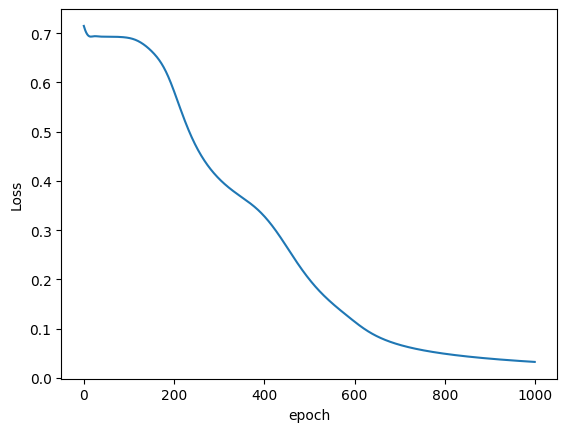

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [ ]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:,0]), max(X[:,0]))
  y_span = np.linspace(min(X[:,1]), max(X[:,1]))
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)##x and y values of each coordinate in grid, then their prediction

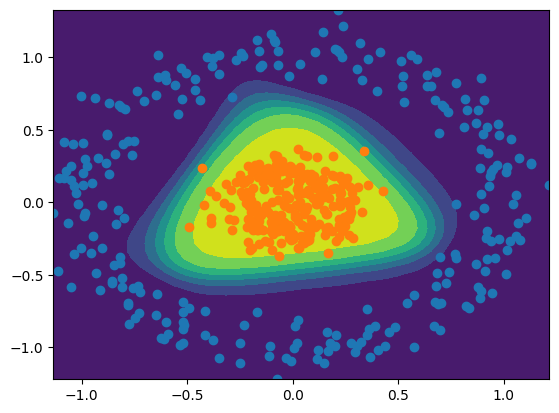

In [ ]:
plot_decision_boundary(X, y)
scatterplot()

Prediction

Prediction:  1


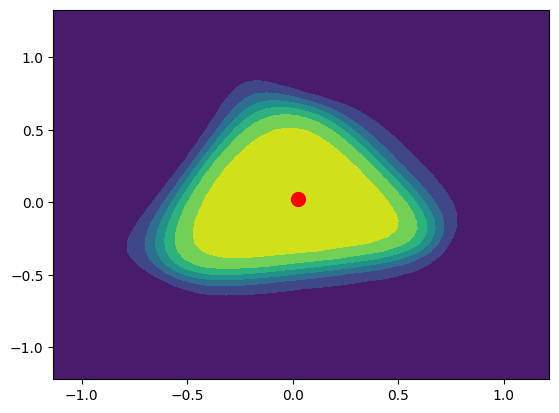

In [ ]:
x1 = 0.025
y1 = 0.025
point = torch.Tensor([x1,y1])
prediction = model.predict(point)
plt.plot([x1], [y1], marker='o', markersize=10, color="red")
print('Prediction: ', prediction)
plot_decision_boundary(X,y)
